## First look at the 4xCO2 simulations

In [1]:
import sys
sys.path.append('/home/users/chingosa/Functions/')
import CMIPFuncs as func
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
import os
import cftime
import requests
from tqdm import tqdm
from dask.diagnostics import ProgressBar
filePaths = pd.read_csv('CO2_4x_url_reduced_wMon.csv', index_col = None)
models = filePaths.model.unique()

In [2]:
ds = xr.open_mfdataset([f'{model}_FT_19_12_24.nc' for model in models])

In [5]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:         (model: 29, lat: 80, lon: 288, quantile: 26)
Coordinates:
  * model           (model) <U16 2kB 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * lat             (lat) float64 640B -39.5 -38.5 -37.5 ... 37.5 38.5 39.5
  * lon             (lon) float64 2kB 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * quantile        (quantile) float64 208B 1e-05 0.01 0.05 ... 0.95 0.975 0.99
    period          <U9 36B 'piControl'
Data variables: (12/26)
    dMSE_land_px    (model, lat, lon, quantile) float64 139MB dask.array<chunksize=(1, 80, 288, 26), meta=np.ndarray>
    dtas_x_land     (quantile, model, lat, lon) float32 69MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>
    dtas_ocean      (model, lat, quantile, lon) float64 139MB dask.array<chunksize=(1, 80, 26, 288), meta=np.ndarray>
    dhuss_x_land    (quantile, model, lat, lon) float32 69MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>
    dhuss_ocean     (model, lat, quantile, lon) float64 139MB dask.array<chunksize=(1, 80, 26, 288), meta=np.ndarray>
    huss_x_land     (quantile, model, lat, lon) float32 69MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>
    ...              ...
    gamma_ro        (model, lat, quantile, lon) float64 139MB dask.array<chunksize=(1, 80, 26, 288), meta=np.ndarray>
    dtas_x_land_FT  (quantile, model, lat, lon) float64 139MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>
    dTo_comp        (model, lat, quantile, lon) float64 139MB dask.array<chunksize=(1, 80, 26, 288), meta=np.ndarray>
    dro_comp        (model, lat, quantile, lon) float64 139MB dask.array<chunksize=(1, 80, 26, 288), meta=np.ndarray>
    DRH_comp        (quantile, model, lat, lon) float32 69MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>
    dRHl_comp       (quantile, model, lat, lon) float32 69MB dask.array<chunksize=(26, 1, 80, 288), meta=np.ndarray>

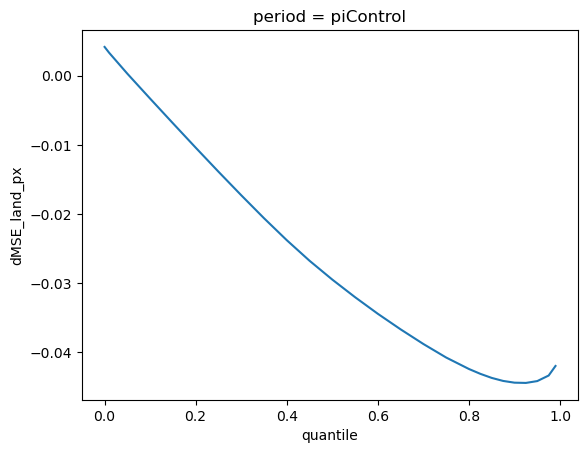

In [4]:
ds.dMSE_land_px.mean(['model', 'lat', 'lon']).plot()

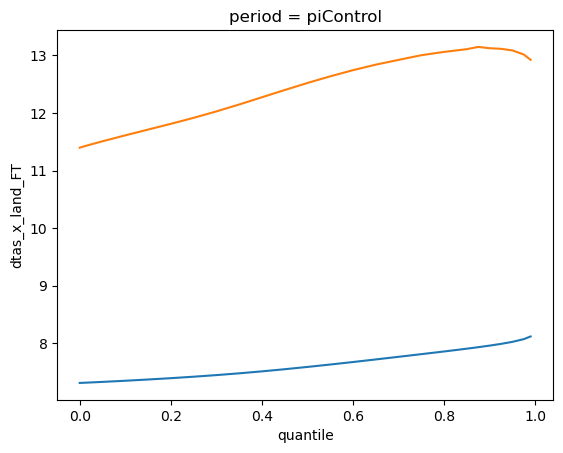

In [7]:
ds.dtas_x_land.mean(['model', 'lat', 'lon']).plot()
ds.dtas_x_land_FT.mean(['model', 'lat', 'lon']).plot()